## CUSTOMER CHURN IN TELECOMMUNICATION COMPANY-SyriaTel

![image](Images/image.png)


### Business Understanding
Our client a telecommunication company would like to be able to reduce the amount of money they loose by the customers that drop off from their services. This project will help to come up with an approrpriate that could predict any patterns of a client churning.

### Data Understanding
The dataset is from SyrialTel,a commmunication company. The data set is found in kaggle `https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset`
The dataset contains information of various users on the the type of calls they made,the duration of the calls,the number of calls,the cost of the calls and whether the customer churned or not.

### Data Preparation
#### Importing Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

#### Loading the data

In [2]:
file_path = r"C:\Users\user\Documents\MORINGA\Phase3\Project\ML_Modelling\bigml_59c28831336c6604c800002a.csv"
df = pd.read_csv(file_path)
df.head() # output the first five rows of the dataset

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### Exploratory Data Analysis
##### Exploring the dataset

In [3]:
# Number of rows and columns
df.shape

(3333, 21)

In [4]:
# Column names
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [5]:
# Data Types for each column
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [6]:
# Information on columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [7]:
# Basic statistics on numeric columns
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
# Checking for null values on columns
df.isnull().any()

state                     False
account length            False
area code                 False
phone number              False
international plan        False
voice mail plan           False
number vmail messages     False
total day minutes         False
total day calls           False
total day charge          False
total eve minutes         False
total eve calls           False
total eve charge          False
total night minutes       False
total night calls         False
total night charge        False
total intl minutes        False
total intl calls          False
total intl charge         False
customer service calls    False
churn                     False
dtype: bool

In [9]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [10]:
# Checking for duplicate values
df.duplicated().any()

False

* There are no null values in our dataset.
* There are no duplicates in our dataset.
* There are non-numeric columnns as follows; state,phone number,international plan,voice mail plan and churn.

##### Data Cleaning


In [11]:
# Converting the non-numeric columns to numeric
# Phone Number Column
# Remove hyphens and other non-numeric characters
df['phone number'] = df['phone number'].str.replace(r'\D+', '', regex=True)

# Convert to numeric (integer) type
df['phone number'] = pd.to_numeric(df['phone number'], errors='coerce')

In [12]:
# international plan and voice mail plan columns
# Initializing LabelEncoder
label_encoder = LabelEncoder()

# Fitting and transforming the data for both columns
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])

In [13]:
# churn column
# Using one-hot encoding
df['churn'] = df['churn'].astype(int)


In [14]:
# state column
# Fit and transform the state column
df['state'] = label_encoder.fit_transform(df['state'])

In [15]:
# confirming the data types in our data set are now all numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   int32  
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   int64  
 4   international plan      3333 non-null   int32  
 5   voice mail plan         3333 non-null   int32  
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

##### Visualizing the features of the dataset
##### Univariate Analysis

1. Distribution of churn

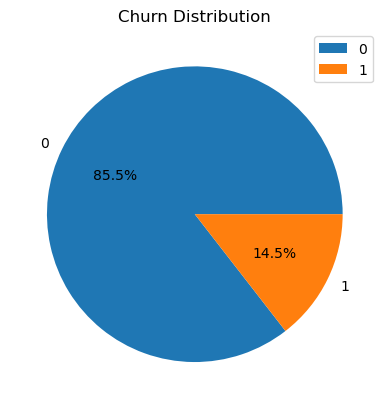

In [16]:
churn_counts = df['churn'].value_counts()
churn_counts.plot(kind='pie', autopct='%1.1f%%', title='Churn Distribution')
plt.ylabel('')
plt.legend()
plt.show()

* 85.5% of the customers did not drop out from the company's services while 14.5% churned.

2. Number of customers on international plan

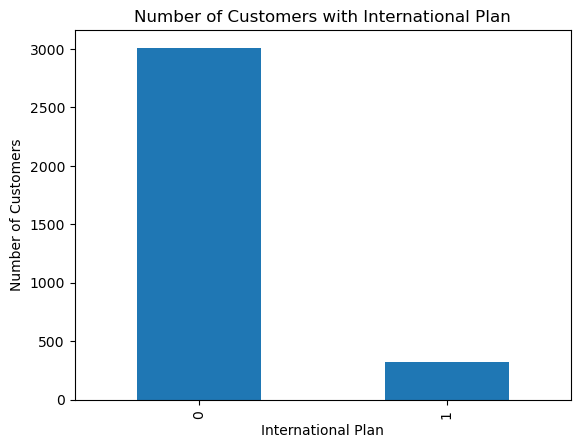

In [17]:
df['international plan'].value_counts().plot(kind='bar', title='Number of Customers with International Plan')
plt.xlabel('International Plan')
plt.ylabel('Number of Customers')
plt.show()


#### Bivariate Analysis
1. Total day minutes by churn

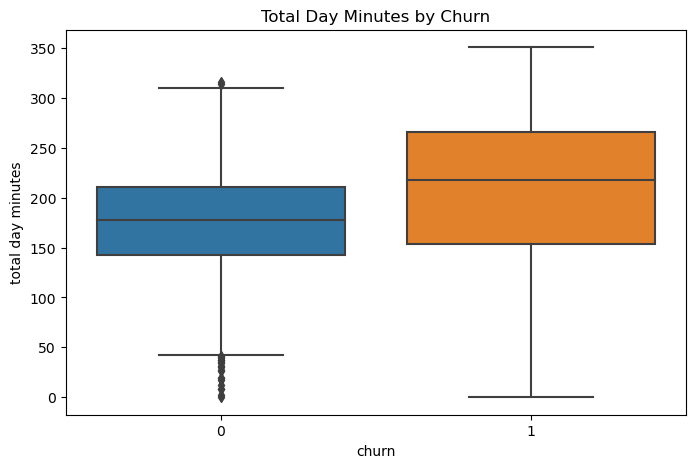

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='total day minutes', data=df)
plt.title('Total Day Minutes by Churn')
plt.show()

2. Total Night Minutes by churn

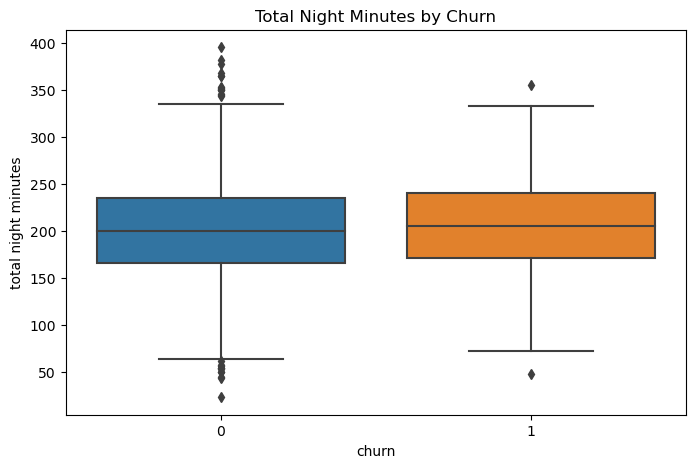

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='total night minutes', data=df)
plt.title('Total Night Minutes by Churn')
plt.show()

3. Customer service calls by churn

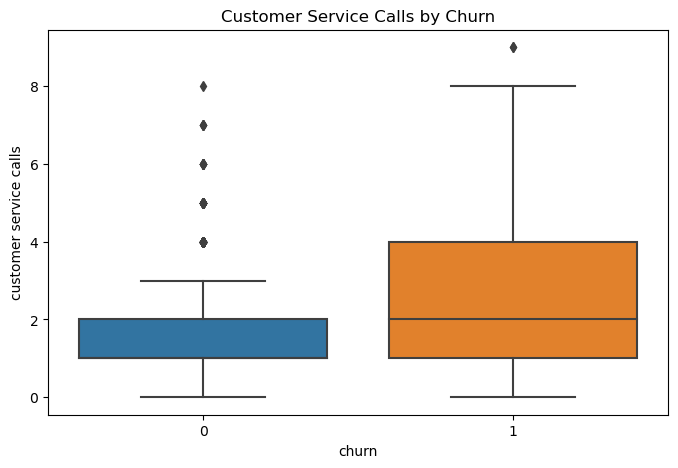

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='customer service calls', data=df)
plt.title('Customer Service Calls by Churn')
plt.show()

#### Multivariate Analysis
1. Correlation between total day minutes,total evening minutes,total night minutes,total international minutes,customer service calls and churn

Text(0.5, 1.0, 'Correlation Heatmap')

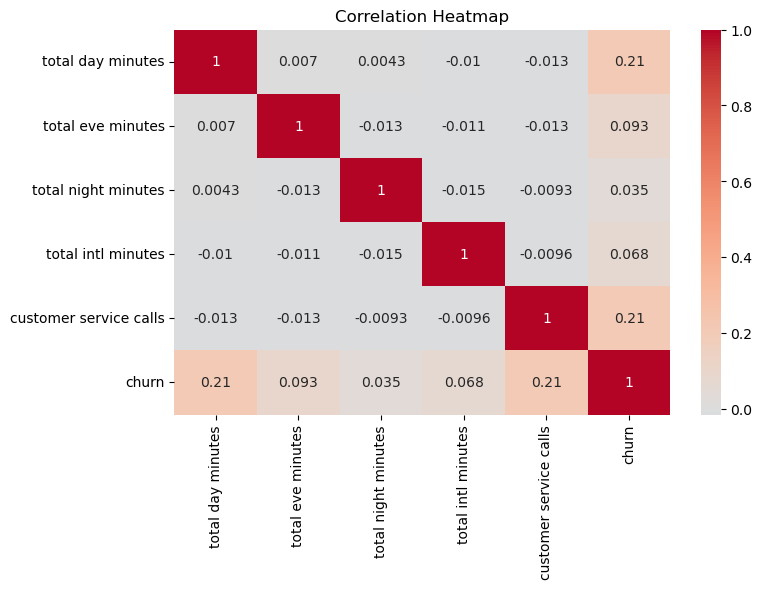

In [21]:
# Compute correlation matrix
correlation_matrix = df[['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes', 'customer service calls', 'churn']].corr()

# Create heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')

### Modelling
1. Logistic Regression

In [22]:

# assigning our target feature and predictor features
X = df.drop(columns='churn')
y = df['churn']
# Splitting our data to train data and test data.Using a test size of 25% and random state of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# output the train size and test size
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (2499, 20), X_test size: (834, 20)


In [23]:
# feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
# Initializing logistic regression model
model = LogisticRegression()

In [25]:
# Training the model
model.fit(X_train,y_train)

LogisticRegression()

In [26]:
# Assessing the performance of the model on the test set
y_pred = model.predict(X_test)


In [27]:
# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"\nAccuracy Score: {accuracy_score(y_test, y_pred)}")



Confusion Matrix:
[[693  16]
 [103  22]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       709
           1       0.58      0.18      0.27       125

    accuracy                           0.86       834
   macro avg       0.72      0.58      0.60       834
weighted avg       0.83      0.86      0.82       834


Accuracy Score: 0.8573141486810552


2. Decision Tree Classification


In [28]:
# Initializing the model
model1= DecisionTreeClassifier(random_state=42)

In [29]:
# Training the model
model1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [30]:
# Assessing the performance of the model on the test set
y_pred1=model1.predict(X_test)

In [31]:
# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred1))

print("\nClassification Report:")
print(classification_report(y_test, y_pred1))

print(f"\nAccuracy Score: {accuracy_score(y_test, y_pred1)}")

Confusion Matrix:
[[665  44]
 [ 33  92]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       709
           1       0.68      0.74      0.70       125

    accuracy                           0.91       834
   macro avg       0.81      0.84      0.83       834
weighted avg       0.91      0.91      0.91       834


Accuracy Score: 0.907673860911271


3. Random Forest Model


In [32]:
# Initializing the model
model2 = RandomForestClassifier(n_estimators=100, random_state=42)

In [33]:
# Training the model
model2.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [34]:
# Assessing the performance of the model on the test set
y_pred2 = model2.predict(X_test)

In [35]:
# Evaluating the model
print("Random Forest Performance:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred2))
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))
print(f"\nAccuracy Score: {accuracy_score(y_test, y_pred2)}")

Random Forest Performance:
Confusion Matrix:
[[705   4]
 [ 39  86]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       709
           1       0.96      0.69      0.80       125

    accuracy                           0.95       834
   macro avg       0.95      0.84      0.89       834
weighted avg       0.95      0.95      0.94       834


Accuracy Score: 0.9484412470023981


### Evaluation

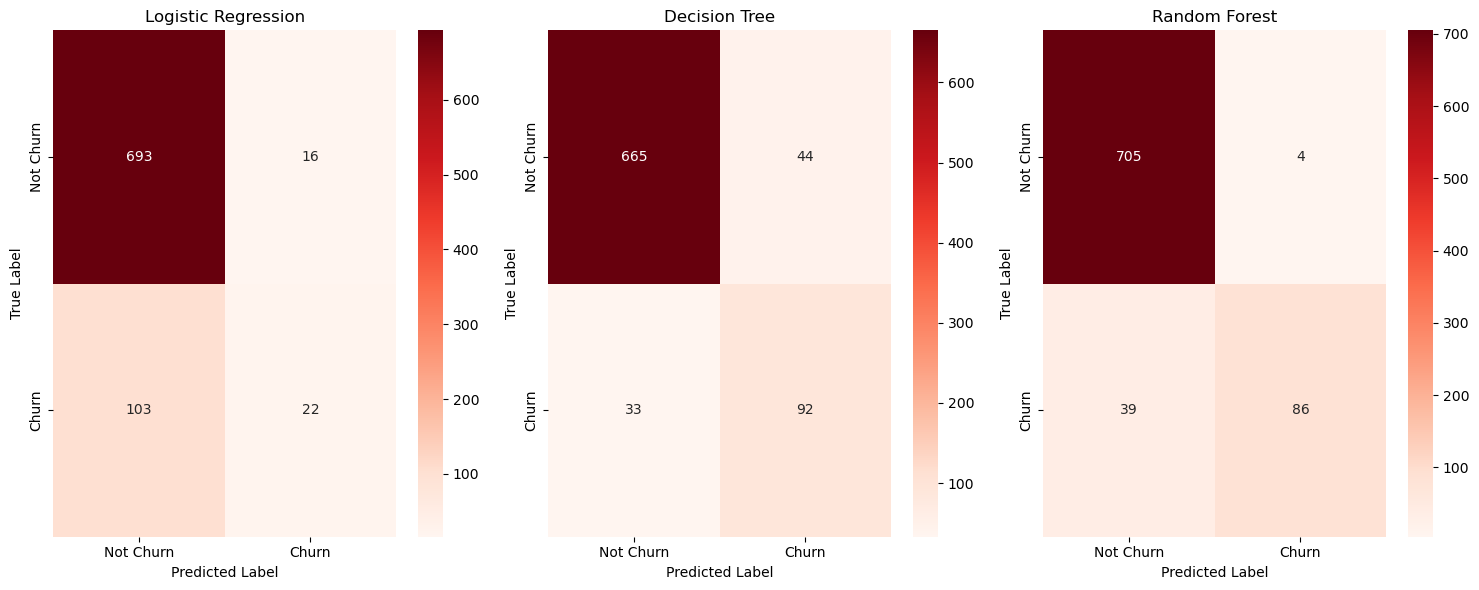

In [36]:
# Visualizing the confusion matrices for the three models
# Labels for the confusion matrix
labels = ['Not Churn', 'Churn']

# Creating a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Titles for the subplots
titles = ['Logistic Regression', 'Decision Tree', 'Random Forest']

# Plotting each confusion matrix
for ax, conf_matrix, title in zip(axes, [confusion_matrix(y_test, y_pred), confusion_matrix(y_test, y_pred1), confusion_matrix(y_test, y_pred2)], titles):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

plt.tight_layout()
plt.show()

The goal is to predict whether a customer is likely to churn (that is, predicting Class 1).

A summary of the three models with respect to predicting churn (Class 1):

1. Logistic Regression

* Precision for Class 1: 0.58
* Recall for Class 1: 0.18
* F1-Score for Class 1: 0.27
* Overall Accuracy: 0.86

2. Decision Tree

* Precision for Class 1: 0.68
* Recall for Class 1: 0.72
* F1-Score for Class 1: 0.70
* Overall Accuracy: 0.91

3. Random Forest

* Precision for Class 1: 0.95
* Recall for Class 1: 0.64
* F1-Score for Class 1: 0.77
* Overall Accuracy: 0.94

Analysis
1. Recall for Class 1 (Ability to identify all true positives,that is a customer churn)

Logistic Regression: 0.18
Decision Tree: 0.72
Random Forest: 0.64
Decision Tree model has the highest recall for Class 1, which means it identifies the most true positive churn cases among the three models. This is crucial for predicting churn, as you want to capture as many actual churn cases as possible.

2. Precision for Class 1 (Accuracy of positive predictions):

Logistic Regression: 0.58
Decision Tree: 0.68
Random Forest: 0.95
Random Forest model has the highest precision for Class 1, meaning that when it predicts churn, it is most accurate. However, it has a slightly lower recall than Logistic Regression, meaning it misses some actual churn cases.

3. F1-Score for Class 1 (Balance between precision and recall):

Logistic Regression: 0.27
Decision Tree: 0.70
Random Forest: 0.77
Random Forest has the highest F1-score for Class 1, which balances precision and recall. This indicates a better overall performance for predicting churn compared to the other models.



#### Conclusion

Random Forest is the best model considering the need to predict churn (Class 1) because it has:

* The highest F1-score for Class 1, which means it balances precision and recall well.
* The highest precision for Class 1, which ensures that when it predicts churn, it is most accurate.
* Decision Tree also performs well, especially in terms of recall however it comes at the cost of having more false positives.
* Logistic Regression performs the worst in predicting churn, with very low recall and F1-score for Class 1, indicating that it is not effective in identifying churn cases.

#### Recommendation

Random Forest is the model giving overall best performance in predicting churn.
